In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

def read_conll(file_path):
    """Read a CoNLL file into a list of sentences (list of [token, pos, tag])."""
    sentences = []
    sentence = []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            if line.strip() == "":
                if sentence:
                    sentences.append(sentence)
                    sentence = []
            else:
                parts = line.strip().split("\t")
                if len(parts) != 3:
                    continue
                sentence.append(parts)
        if sentence:
            sentences.append(sentence)
    return sentences

def save_conll(sentences, file_path):
    """Save sentences in CoNLL format."""
    with open(file_path, "w", encoding="utf-8") as f:
        for sent in sentences:
            for token, pos, tag in sent:
                f.write(f"{token}\t{pos}\t{tag}\n")
            f.write("\n")

def get_majority_label(sent):
    """Get most common non-'O' tag in a sentence for stratification."""
    tags = [t[2] for t in sent if t[2] != "O"]
    return Counter(tags).most_common(1)[0][0] if tags else "O"

def label_distribution_table(train, val, test):
    """Create a DataFrame showing label counts and percentages for each split."""
    def tag_counts(sentences):
        tags = [tag for sent in sentences for _, _, tag in sent]
        total = len(tags)
        counter = Counter(tags)
        return {tag: (count, count / total * 100) for tag, count in counter.items()}

    train_counts = tag_counts(train)
    val_counts = tag_counts(val)
    test_counts = tag_counts(test)

    all_labels = sorted(set(train_counts) | set(val_counts) | set(test_counts))
    rows = []
    for label in all_labels:
        t_count, t_pct = train_counts.get(label, (0, 0))
        v_count, v_pct = val_counts.get(label, (0, 0))
        te_count, te_pct = test_counts.get(label, (0, 0))
        rows.append([
            label,
            f"{t_count} ({t_pct:.2f}%)",
            f"{v_count} ({v_pct:.2f}%)",
            f"{te_count} ({te_pct:.2f}%)"
        ])

    df = pd.DataFrame(rows, columns=["Label", "Train", "Val", "Test"])
    return df


# ===== Main Process =====
input_file = "../datasets/3entity_annotated_ner_cleaned.conll"
sentences = read_conll(input_file)

# Labels for stratification
labels = [get_majority_label(s) for s in sentences]

# First split: train (80%), test (20%)
train_sent, test_sent, y_train, y_test = train_test_split(
    sentences, labels, test_size=0.2, random_state=42, stratify=labels
)

# Second split: train (80% of 80%), val (20% of 80%)
train_sent, val_sent, _, _ = train_test_split(
    train_sent, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Save to files
save_conll(train_sent, "ner_train.conll")
save_conll(val_sent, "ner_val.conll")
save_conll(test_sent, "ner_test.conll")

# Show table
df_dist = label_distribution_table(train_sent, val_sent, test_sent)
print(df_dist.to_string(index=False))


 Label            Train             Val            Test
B-DATE     8437 (0.50%)    2112 (0.51%)    2744 (0.52%)
 B-LOC    35043 (2.09%)    8908 (2.13%)   10967 (2.08%)
B-TIME     1834 (0.11%)     429 (0.10%)     635 (0.12%)
I-DATE    13665 (0.82%)    3430 (0.82%)    4361 (0.83%)
 I-LOC    25540 (1.53%)    6433 (1.54%)    8158 (1.54%)
I-TIME     2315 (0.14%)     557 (0.13%)     809 (0.15%)
     O 1587385 (94.81%) 396093 (94.77%) 500371 (94.76%)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

def read_conll(file_path):
    """Read a CoNLL file into a list of sentences (list of [token, pos, tag])."""
    sentences, sentence = [], []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            if line.strip() == "":
                if sentence:
                    sentences.append(sentence)
                    sentence = []
            else:
                parts = line.strip().split("\t")
                if len(parts) == 3:
                    sentence.append(parts)
        if sentence:
            sentences.append(sentence)
    return sentences

def save_conll(sentences, file_path):
    """Save sentences in CoNLL format."""
    with open(file_path, "w", encoding="utf-8") as f:
        for sent in sentences:
            for token, pos, tag in sent:
                f.write(f"{token}\t{pos}\t{tag}\n")
            f.write("\n")

def get_majority_label(sent):
    """Get most common non-'O' tag in a sentence for stratification."""
    tags = [t[2] for t in sent if t[2] != "O"]
    return Counter(tags).most_common(1)[0][0] if tags else "O"

def label_distribution_table(train, test):
    """Create a DataFrame showing label counts and percentages for each split."""
    def tag_counts(sentences):
        tags = [tag for sent in sentences for _, _, tag in sent]
        total = len(tags)
        counter = Counter(tags)
        return {tag: (count, count / total * 100) for tag, count in counter.items()}

    train_counts = tag_counts(train)
    test_counts = tag_counts(test)

    all_labels = sorted(set(train_counts) | set(test_counts))
    rows = []
    for label in all_labels:
        tr_count, tr_pct = train_counts.get(label, (0, 0))
        te_count, te_pct = test_counts.get(label, (0, 0))
        rows.append([
            label,
            f"{tr_count} ({tr_pct:.2f}%)",
            f"{te_count} ({te_pct:.2f}%)"
        ])

    return pd.DataFrame(rows, columns=["Label", "Train", "Test"])


# ===== Main Process =====
input_file = "../datasets/3entity_annotated_ner_cleaned.conll"
sentences = read_conll(input_file)

# Labels for stratification
labels = [get_majority_label(s) for s in sentences]

# Split into train (80%) and test (20%)
train_sent, test_sent, y_train, y_test = train_test_split(
    sentences, labels, test_size=0.2, random_state=42, stratify=labels
)

# Save files
save_conll(train_sent, "ner_80train.conll")
save_conll(test_sent, "ner_20test.conll")

# Show distribution table
df_dist = label_distribution_table(train_sent, test_sent)
print(df_dist.to_string(index=False))


 Label            Train            Test
B-DATE    10549 (0.50%)    2744 (0.52%)
 B-LOC    43951 (2.10%)   10967 (2.08%)
B-TIME     2263 (0.11%)     635 (0.12%)
I-DATE    17095 (0.82%)    4361 (0.83%)
 I-LOC    31973 (1.53%)    8158 (1.54%)
I-TIME     2872 (0.14%)     809 (0.15%)
     O 1983478 (94.80%) 500371 (94.76%)


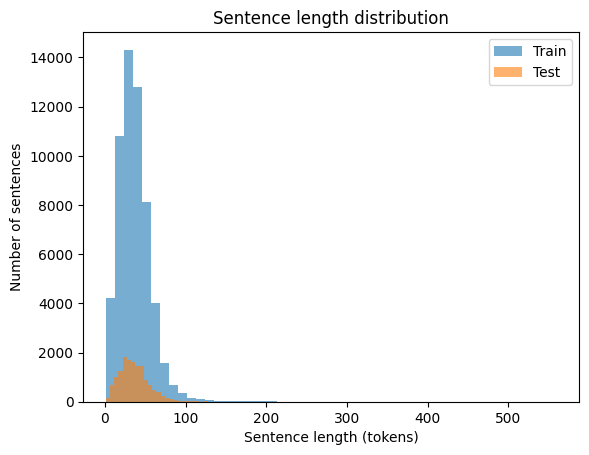


Train Split Sentence Length Stats:
  Total sentences: 57368
  Min length: 1
  Max length: 560
  Mean length: 36.47
  Median length: 34.0

Test Split Sentence Length Stats:
  Total sentences: 14343
  Min length: 1
  Max length: 263
  Mean length: 36.82
  Median length: 34.0


In [2]:
import matplotlib.pyplot as plt

def sentence_length_distribution(sentences, split_name, bins=50):
    """Plot histogram of sentence lengths for a given split."""
    lengths = [len(s) for s in sentences]
    plt.hist(lengths, bins=bins, alpha=0.6, label=split_name)
    return lengths

# Plot sentence length distribution
train_lengths = sentence_length_distribution(train_sent, "Train")
test_lengths = sentence_length_distribution(test_sent, "Test")

plt.xlabel("Sentence length (tokens)")
plt.ylabel("Number of sentences")
plt.title("Sentence length distribution")
plt.legend()
plt.show()

# Print descriptive stats
import numpy as np
def describe_lengths(lengths, name):
    print(f"\n{name} Split Sentence Length Stats:")
    print(f"  Total sentences: {len(lengths)}")
    print(f"  Min length: {np.min(lengths)}")
    print(f"  Max length: {np.max(lengths)}")
    print(f"  Mean length: {np.mean(lengths):.2f}")
    print(f"  Median length: {np.median(lengths)}")

describe_lengths(train_lengths, "Train")
describe_lengths(test_lengths, "Test")
